# Regional Analysis
- Continent sales percentage
- Top sales by countries and cities

### Importing libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine

### Loading data

In [4]:
# Define the connection details
server = 'DESKTOP-D57LVN9\SQLEXPRESS'
database = 'ContosoRetail'
username = 'sa'
password = '281202'

# Create the connection string
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Write SQL query
query = "select * from regional_revenue"

# Load data into a pandas DataFrame
df_origin = pd.read_sql(query, engine)
 
# No need to explicitly close the engine, but it’s good practice to dispose of it when done
engine.dispose()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\duyvn\AppData\Local\Temp\ipykernel_908\1015312421.py:2: SyntaxWarning: invalid escape sequence '\S'
  server = 'DESKTOP-D57LVN9\SQLEXPRESS'


In [10]:
df_origin.head()

,Continent,Country,City,SalesAmount,TotalCost,SalesQuantity,ReturnAmount,ReturnQuantity,DiscountAmount
0,Europe,United Kingdom,Baildon,1544.400,728.40,8,0.0,0,39.600
1,North America,United States,Seattle,78.605,40.60,4,0.0,0,0.995
2,Europe,United Kingdom,Cambridge,3628.500,1881.27,9,0.0,0,61.500
3,Europe,Germany,Berlin,2254.200,1063.20,8,0.0,0,57.800
4,Europe,Germany,Berlin,10207.080,3468.48,24,0.0,0,261.720


### Continent revenue, cost, sales quantity

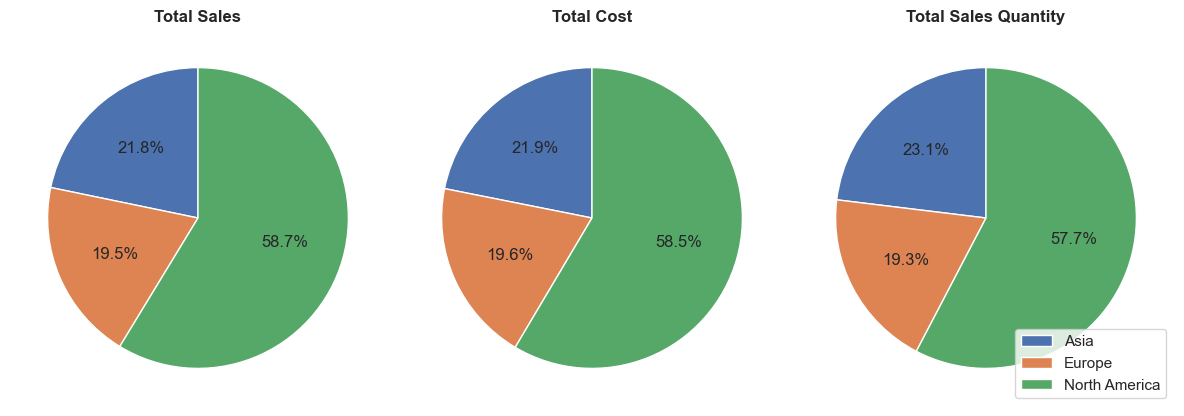

In [71]:
# Extracting data
df_continent = df_origin[['Continent','SalesAmount','TotalCost','SalesQuantity']].copy()

# Calculating
df_continent = df_continent.groupby('Continent')[['SalesAmount','TotalCost','SalesQuantity']].sum().reset_index()

# Plotting
fig, ax = plt.subplots(1,3, figsize=(12,7))

dict_column = {
    'SalesAmount': 'Total Sales',
    'TotalCost': 'Total Cost',
    'SalesQuantity': 'Total Sales Quantity'
}

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(
        data=df_continent, 
        startangle=90, 
        autopct='%1.1f%%', 
        x=column
    )
    ax[i].set_title(title, fontweight='bold')
    
ax[2].legend(df_continent['Continent'], loc='lower right')
fig.tight_layout()

plt.show()

### Return rates by top sales countries

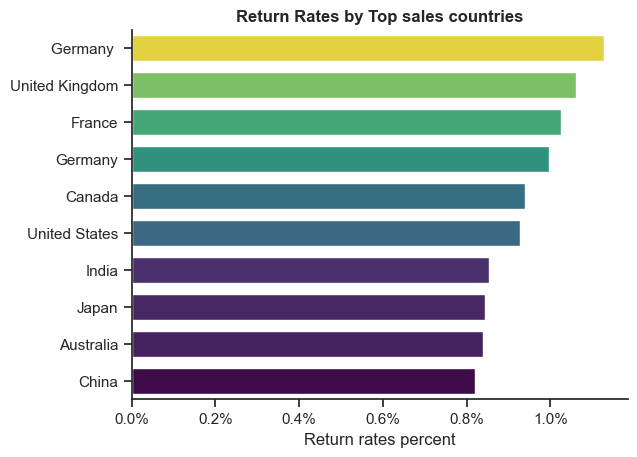

In [69]:
# Extracting data
df_return_rates = df_origin[['Country','SalesAmount','SalesQuantity','ReturnQuantity']].copy()

# Calculating return rates
df_return_rates = df_return_rates.groupby('Country')[['SalesAmount','SalesQuantity','ReturnQuantity']].sum().sort_values(by='SalesAmount', ascending=False).head(10)
df_return_rates['ReturnRates'] = (df_return_rates['ReturnQuantity'] / df_return_rates['SalesQuantity']) * 100
df_return_rates = df_return_rates.reset_index()[['Country','ReturnRates']].sort_values(by='ReturnRates', ascending=False)

# Plotting
sns.set_theme(style='ticks')
sns.barplot(
    data=df_return_rates,
    x='ReturnRates',
    y='Country',
    hue='ReturnRates',
    palette='viridis',
    legend=False,
    width=0.7
)
sns.despine()

# Formatting
plt.title('Return Rates by Top sales countries', fontweight='bold')
plt.ylabel('')
plt.xlabel('Return rates percent')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.show()

### Customer orders by Region

In [110]:
# Extracting data
df_sales_country = df_origin[['Country','City','SalesAmount']].copy()

# Calculating
df_sales_country = df_sales_country.groupby(['Country'])['SalesAmount'].mean().to_frame(name='Sales Amount').reset_index()
df_sales_country

# Plotting
fig = px.choropleth(df_sales_country,
                    locations='Country',
                    locationmode='country names',
                    color='Sales Amount',
                    basemap_visible=True,
                    height=400,
                    width=700,
                    )

fig.show()